## Observations and Insights

Here are my observations.
1) There were ten drug regimens used to treat SCC tumor growth over 45 days. of these, Capomulin seemed to be the most responsive to reduce the tumor volume with Ramicane comeing in second.
2) Of the animal study, the sex of the mice were closely split 50.6% male and 49.4% female.
3) Reviewing the scatter diagram and regression line, Capolmulin again showed a strong correlation with an r-squared value of 0.841.
4) Suprisingly, in reviewing the box plots, I could not find any outliers in this data set. I even ran one drug by itself to verify. I left this in the code below.

In [54]:
# Dependencies and Setup - - - - - - - - - - - -                                        Randy Dettmer - - - main - - - 3/6/2020
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [55]:
#review first file data to determine key for merge
#mouse_metadata.head()

In [56]:
#review second file data to determine key for merge
#study_results.head()

In [57]:
#join both datasets on Mouse ID as the key
df1 = pd.merge(mouse_metadata, study_results ,on="Mouse ID")
df1.head() #- option to review the head

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [58]:
#start to generate summary statistics
#group by Drug Regimen
df2 = df1.groupby('Drug Regimen')
#generate mean tumor volume
drug_mean = df2['Tumor Volume (mm3)'].mean()

In [59]:
#generate median/average of tumor volume
drug_median = df2['Tumor Volume (mm3)'].median()

In [60]:
#generate variance of tumor volume
drug_var = df2['Tumor Volume (mm3)'].var()

In [61]:
#generate standard deviation of tumor volume
drug_std = df2['Tumor Volume (mm3)'].std()

In [62]:
#generate SEM of tumor volume
drug_sem = df2['Tumor Volume (mm3)'].sem()

In [63]:
#generate new table with summary statistics
regimen_count = df1["Drug Regimen"].value_counts()
df3 = pd.DataFrame(regimen_count)
#df3.reset_index(level=0, inplace=True) #test may need removed
#df3 = df3.rename(columns={"index":"Drug Regimen", "Drug Regimen" : "Data Points"})
df3["Mean"] = drug_mean
df3["Median"] = drug_median
df3["Variance"] = drug_var
df3["Standard Deviation"] = drug_std
df3["SEM"] = drug_sem
df3.reset_index(level=0, inplace=True) #test may need removed
df3.head()

,index,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
2,Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
3,Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
4,Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar Charts

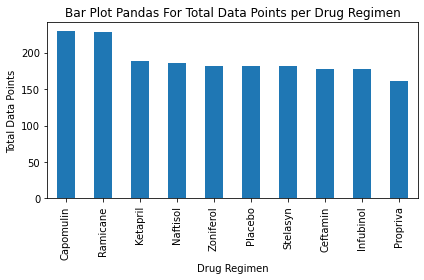

In [89]:
#create bar chart in pandas showing data points per drug regimen
regimen_count.plot(kind="bar")
plt.title("Bar Plot Pandas For Total Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Data Points")
plt.tight_layout()
plt.savefig("Bar_Panda.png")

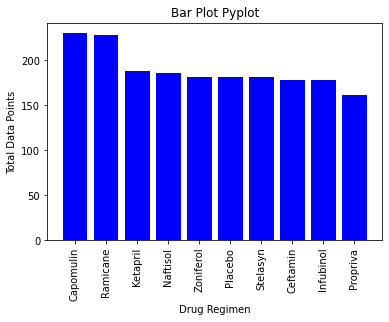

In [65]:
#create bar chart in pyplot
regimen_x = np.arange(len(regimen_count))
tick_locations = [value for value in regimen_x]
drug_ticks = df3.iloc[:,0]
plt.xticks(tick_locations, drug_ticks, rotation='vertical')
plt.bar(regimen_x, regimen_count, color='b', align='center')
plt.title("Bar Plot Pyplot")
plt.ylabel("Total Data Points")
plt.xlabel("Drug Regimen")
plt.savefig("Bar_Pyplot.png")

## Pie plots

In [66]:
#pie plot showing distribution of female versus male mice
gender_split = df1["Sex"].value_counts()
df4 = pd.DataFrame(gender_split)
df4

,Sex
Male,958
Female,935


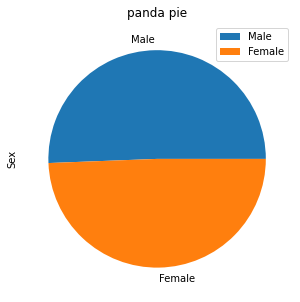

In [88]:
#pie plot using pandas
df4.plot.pie(y='Sex', figsize=(5, 5))
plt.title("panda pie")
plt.savefig("Pie_Panda.png")

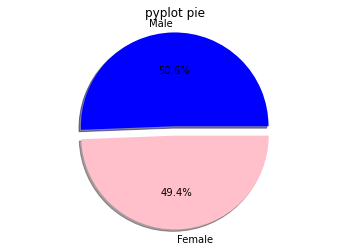

In [68]:
#pie plot using pyplot
labels = ["Male", "Female"]
sizes = gender_split
colors =["blue", "pink"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
plt.axis("equal")
plt.title("pyplot pie")
plt.savefig("Pie_Pyplot.png")

## Quartiles, outliers and boxplots

In [69]:
#df1.Timepoint.max() #this is equal to 45
#verify all ten drugs have 45 as the highest time and the answer is yes
#time_max = df2.Timepoint.max()
#df11 = df2["Drug Regimen","Tumor Volume (mm3)"].Timepoint.max()
#print(time_max)

In [70]:
#extract maximum Timepoint (45 as determined above) per drug with tumor volume
captp45 = df1.loc[(df1["Drug Regimen"] == "Capomulin") & (df1["Timepoint"] == df1["Timepoint"].max()), :]
ramtp45 = df1.loc[(df1["Drug Regimen"] == "Ramicane") & (df1["Timepoint"] == df1["Timepoint"].max()), :]
inftp45 = df1.loc[(df1["Drug Regimen"] == "Infubinol") & (df1["Timepoint"] == df1["Timepoint"].max()), :]
ceftp45 = df1.loc[(df1["Drug Regimen"] == "Ceftamin") & (df1["Timepoint"] == df1["Timepoint"].max()), :]

In [71]:
#tumor volumes
captv = captp45["Tumor Volume (mm3)"].sort_values() #Capomulin tumor volumes
ramtv = ramtp45["Tumor Volume (mm3)"].sort_values() #Ramicane tumor volumes
inftv = inftp45["Tumor Volume (mm3)"].sort_values() #Infubinol tumor volumes
ceftv = ceftp45["Tumor Volume (mm3)"].sort_values() #Ceftamin tumor volumes

#calculate quartiles and outlier ranges for Capomulin
qcaptv = captv.quantile([.25,.5,.75])
lcaptv = qcaptv[0.25]
ucaptv = qcaptv[0.75]
iqrcaptv = ucaptv-lcaptv
print(f'The lower quartile of tumor volume for Capomulin is: {lcaptv}')
print(f'The upper quartile of tumor volume for Capomulin is: {ucaptv}')
print(f'The interquartile range of tumor volume for Capomulin is: {iqrcaptv}')
lbcaptv = lcaptv - (1.5*iqrcaptv)
ubcaptv = ucaptv + (1.5*iqrcaptv)
print(f'Values below {lbcaptv} could be outliers.')
print(f'Values above {ubcaptv} could be outliers.')
print('---------------------------------------------------------------')

#calculate quartiles and outlier ranges for Ramicane
qramtv = ramtv.quantile([.25,.5,.75])
lramtv = qramtv[0.25]
uramtv = qramtv[0.75]
iqrramtv = uramtv-lramtv
print(f'The lower quartile of tumor volume for Ramicane is: {lramtv}')
print(f'The upper quartile of tumor volume for Ramicane is: {uramtv}')
print(f'The interquartile range of tumor volume for Ramicane is: {iqrramtv}')
lbramtv = lramtv - (1.5*iqrramtv)
ubramtv = uramtv + (1.5*iqrramtv)
print(f'Values below {lbramtv} could be outliers for Ramicane.')
print(f'Values above {ubramtv} could be outliers for Ramicane.')
print('---------------------------------------------------------------')

#calculate quartiles and outlier ranges for Infubinol
qinftv = inftv.quantile([.25,.5,.75])
linftv = qinftv[0.25]
uinftv = qinftv[0.75]
iqrinftv = uinftv-linftv
print(f'The lower quartile of tumor volume for Infubinol is: {linftv}')
print(f'The upper quartile of tumor volume for Infubinol is: {uinftv}')
print(f'The interquartile range of tumor volume for Infubinol is: {iqrinftv}')
lbinftv = linftv - (1.5*iqrinftv)
ubinftv = uinftv + (1.5*iqrinftv)
print(f'Values below {lbinftv} could be outliers for Infubinol.')
print(f'Values above {ubinftv} could be outliers for Infubinol.')
print('---------------------------------------------------------------')

#calculate quartiles and outlier ranges for Ceftamin
qceftv = ceftv.quantile([.25,.5,.75])
lceftv = qceftv[0.25]
uceftv = qceftv[0.75]
iqrceftv = uceftv-lceftv
print(f'The lower quartile of tumor volume for Ceftamin is: {lceftv}')
print(f'The upper quartile of tumor volume for Ceftamin is: {uceftv}')
print(f'The interquartile range of tumor volume for Ceftamin is: {iqrceftv}')
lbceftv = lceftv - (1.5*iqrceftv)
ubceftv = uceftv + (1.5*iqrceftv)
print(f'Values below {lbceftv} could be outliers for Ceftamin.')
print(f'Values above {ubceftv} could be outliers for Ceftamin.')
print('---------------------------------------------------------------')

The lower quartile of tumor volume for Capomulin is: 32.37735684
The upper quartile of tumor volume for Capomulin is: 40.1592203
The interquartile range of tumor volume for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------------------------------
The lower quartile of tumor volume for Ramicane is: 30.981175224999998
The upper quartile of tumor volume for Ramicane is: 38.508305307499995
The interquartile range of tumor volume for Ramicane is: 7.527130082499998
Values below 19.690480101250003 could be outliers for Ramicane.
Values above 49.79900043124999 could be outliers for Ramicane.
---------------------------------------------------------------
The lower quartile of tumor volume for Infubinol is: 62.75445141
The upper quartile of tumor volume for Infubinol is: 67.68556862
The interquartile range of tumor volume for Infubinol is: 4.9311172099999965
Values below 55.357775

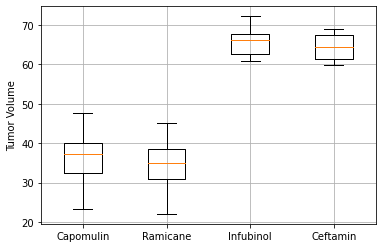

In [87]:
#Box plot set up
captv = captp45["Tumor Volume (mm3)"].sort_values()
ramtv = ramtp45["Tumor Volume (mm3)"].sort_values()
inftv = inftp45["Tumor Volume (mm3)"].sort_values()
ceftv = ceftp45["Tumor Volume (mm3)"].sort_values()
red_square = dict(markerfacecolor = 'r', marker='s')

fig, ax1 = plt.subplots()

ax1.set_ylabel("Tumor Volume")

ax1.boxplot([captv, ramtv, inftv, ceftv], flierprops=red_square)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.grid()

plt.savefig("BoxplotAll.png") #prints black screen

In [73]:
#print(captv) #to check values - ok min is 23.343598 and max is 47.685963 with a total of 21 values

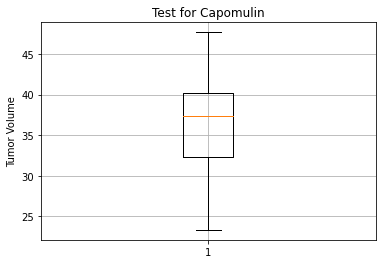

In [74]:
#test one drug regimen only to see if markers show up - they don't + + + + + + + + + + + + + + + + + + + + +
green_diamond = dict(markerfacecolor = 'g', marker='D')
fig2, ax = plt.subplots()
ax.set_title("Test for Capomulin")
ax.set_ylabel("Tumor Volume")
ax.boxplot(captv, flierprops=green_diamond)
ax.grid()
plt.show()

## Line and scatter plots

In [75]:
#filter on Capomulin and one mouse
capmouse = df1.loc[(df1["Drug Regimen"] == "Capomulin") & (df1["Mouse ID"] == "s185"), :]
#print(capmouse)

In [76]:
#set capmouse into a data frame
df_s185 = pd.DataFrame(capmouse)
df_s185.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


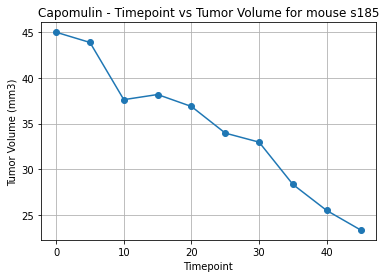

In [86]:
#line plot set up for time point vs tumor volume for capomulin drug regimen for mouse s185
plt.plot(df_s185.iloc[:,5],df_s185.iloc[:,6], marker="o")
plt.title("Capomulin - Timepoint vs Tumor Volume for mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.savefig("LinePlot.png")

In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [79]:
#Capomulin mouse weight vs average tumor volume
capmwtv = df1.loc[(df1["Drug Regimen"] == "Capomulin"), :]
dfy = pd.DataFrame(capmwtv)

In [80]:
#capture capomulin mouse weight - could have used min or max here because the weights of the mice don't change
capmousewgt = dfy.groupby("Mouse ID").min()["Weight (g)"]
#print(capmousecntwgt)

In [81]:
#this is what we need for the average tumor volume for each mouse in the capomulin drug regimen
capmouseavgtv = dfy.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
#print(capmouseavgtv)

In [82]:
#create a new data frame for unique "Mouse ID" and "Weight (g)" - - - - - generate df here
dfz = pd.DataFrame({"Weight_g" : capmousewgt, "Avg_TV" : capmouseavgtv})
dfz.head()

,Weight_g,Avg_TV
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


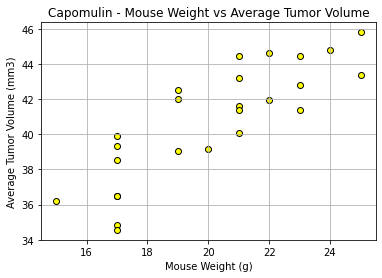

In [83]:
#scatter diagram showing mouse weight vs average tumor volume for capomulin drug regemin - OK
plt.scatter(dfz.iloc[:,0], dfz.iloc[:,1], marker ="o", facecolors="yellow", edgecolors="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin - Mouse Weight vs Average Tumor Volume")
plt.grid()
plt.savefig("ScatterDiagram.png")

In [84]:
#calculate correlation between mouse weight and the average tumor volume - OK
mousewgt = dfz.iloc[:,0] #mouse weight
avgtumorv = dfz.iloc[:,1] #average tumor volume
correlation = st.pearsonr(mousewgt,avgtumorv)
print(f"The correlation between mouse Weight(g) and the average Tumor Volume(mm3) is {round(correlation[0],2)}")

The correlation between mouse Weight(g) and the average Tumor Volume(mm3) is 0.84


The r-squared is: 0.8419363424694718


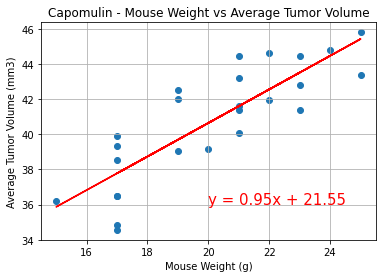

In [85]:
#scatter diagram showing mouse weight vs average tumor volume for capomulin drug regemin with regression line - OK
#plt.scatter(dfz.iloc[:,0], dfz.iloc[:,1], marker ="o", facecolors="yellow", edgecolors="black")
x_values = dfz.iloc[:,0]
y_values = dfz.iloc[:,1]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin - Mouse Weight vs Average Tumor Volume")
print(f"The r-squared is: {rvalue}")
plt.grid()
plt.savefig("ScatterDiagramRegression.png")

In [ ]:
#end of file